<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/20220704-0311-2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [7]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# file pre-processing
PRE_FILE_PATH = "/content/drive/MyDrive/data/20220704-0311-2-2" # change data floder path here
FILE_PATH = PRE_FILE_PATH + "/pre-processed"

if not os.path.exists(FILE_PATH):
  os.mkdir(FILE_PATH)

for file_name in os.listdir(PRE_FILE_PATH):
  if file_name == "pre-processed":
    continue
  with open(PRE_FILE_PATH + "/" + file_name, 'r') as fp:
    lines = fp.readlines()
  with open(FILE_PATH + "/" + file_name, 'w') as fp:
    for line in lines:
      if line[0] != '!':
        fp.write(line)

In [6]:
df_list = []
temp_list = []

def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  # print(file_name)
  # get temp from file name and convert to k
  temp = int(file_name[0:file_name.find('.')])  # change this line according to file name, python string processing
  converted_temp = temp_convertor(temp)
  temp_list.append(converted_temp)
  
  df_list.append(df)
  
def print_list(df_list, temp_list):
  for df, temp in zip(df_list, temp_list):
    print(temp)
    print(df.head(3))

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# sort data base on temperature
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]
temp_list, df_list = sort_data(temp_list, df_list)

print_list(df_list, temp_list)

298
       0          1          2         3
0  0.018  47.646488  30.287250  0.001280
1  0.019  38.605755  26.584287  0.001351
2  0.020  32.661083  23.658188  0.001422
393
       0          1          2         3
0  0.018  33.527428  25.406481  0.001280
1  0.019  29.710005  23.321171  0.001351
2  0.020  37.116058  25.220118  0.001422
403
       0          1          2         3
0  0.018  53.319176  32.039528  0.001280
1  0.019  48.093861  29.671795  0.001351
2  0.020  35.157303  24.545618  0.001422
413
       0          1          2         3
0  0.018  20.558144  19.894652  0.001280
1  0.019  22.031385  20.082598  0.001351
2  0.020  45.022449  27.776706  0.001422
423
       0          1          2         3
0  0.018  70.556190  36.856319  0.001280
1  0.019  62.839115  33.916734  0.001351
2  0.020  63.509453  32.990232  0.001422
433
       0          1          2         3
0  0.018  48.731018  30.630010  0.001280
1  0.019  43.959591  28.367811  0.001351
2  0.020  34.596497  24.349063  0

# Fig 1

x: 4th col * 10 

y: 2nd

[298, 393, 403, 413, 423, 433, 443, 453, 463, 473, 478, 483, 488, 493, 498, 503, 508, 513, 518, 523, 528, 533, 538, 543, 548, 553]


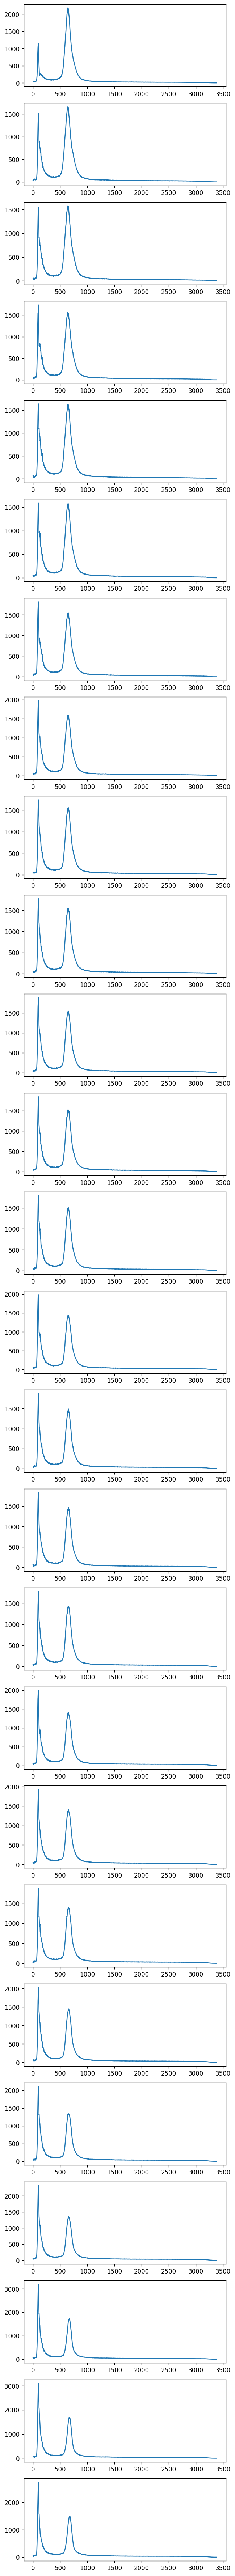

In [10]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
# plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index
print(temp_list)

# Fig 2
Find second peaks with scipy

In [11]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [12]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)
print(temp_list)

[2181.228516, 1657.774658, 1578.651489, 1567.96106, 1629.207886, 1580.029297, 1552.328369, 1590.179443, 1556.277588, 1546.063599, 1553.366821, 1514.480225, 1503.431641, 1435.976563, 1488.954834, 1460.696045, 1432.987549, 1401.545288, 1409.15564, 1393.606201, 1447.968994, 1340.145264, 1352.374512, 1724.982666, 1694.530029, 1496.491455]
[298, 393, 403, 413, 423, 433, 443, 453, 463, 473, 478, 483, 488, 493, 498, 503, 508, 513, 518, 523, 528, 533, 538, 543, 548, 553]


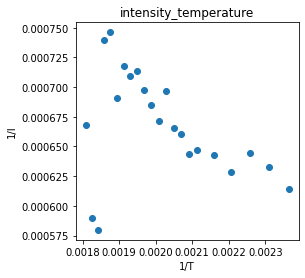

In [13]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
x,y = sort_data(x, y)
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')

# print(temp_list, peaks_value)
plt.scatter(x[0:22], y[:22], linewidth = 1.0, linestyle = '-')
plt.show()

# Fig 3

In [14]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

# x_fit = x[2:5]
# y_fit = y[2:5]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
# res = st.linregress(x_fit, y_fit)
# plt.plot(x_fit, y_fit, 'o', label='original data')
# plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
# print(1/(res.intercept/((-1)*res.slope))-273)
# print(res.intercept)
# plt.legend()
# plt.figure(figsize=(4, 4),dpi=120)
# plt.scatter(x[:18],y[:18])
# plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

0.4699373657708648
0.470167007019069
0.47090660276584123
0.4715169399150077
0.4723093145187844
0.47289603114260365
0.4736514353195952
0.4743251637139786
0.4750431526382576
0.47565201427664283
0.476340962210663
0.47702367830314363
0.47768955635303345
0.47833367000456517
0.4790983701331055
0.47975833381844163
0.4803941006799222
0.48106940852956254
0.4818043488438798
0.4825493105456119
0.4832745784426094
0.4839650396137603
0.4847693671213811
0.4863231287122943
0.48758076258195254
0.4886704829807904


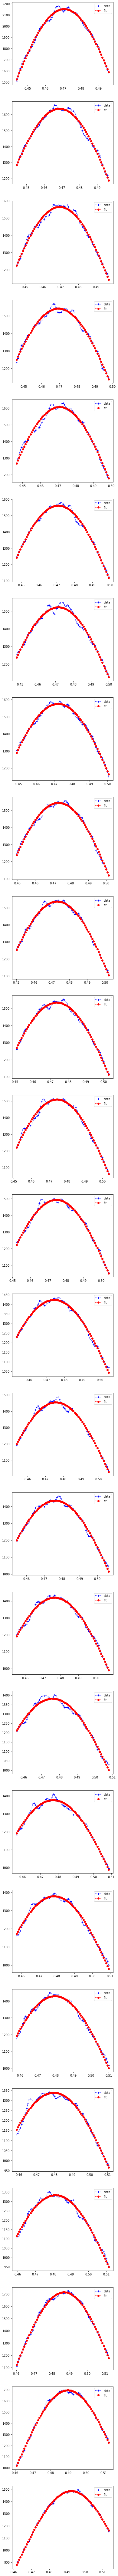

In [97]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

def gaus(x, a, x0, sigma):
  return a * (1/(sigma * (np.sqrt(2*np.pi)))) *np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  START_REGION = 606+i*1
  END_REGION  = 680+i*1
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]
  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  print(mean)
  plt.legend()

FWHM:0.07597
FWHM:0.08173
FWHM:0.08191
FWHM:0.08589
FWHM:0.08283
FWHM:0.08185
FWHM:0.08610
FWHM:0.08677
FWHM:0.08331
FWHM:0.08412
FWHM:0.08628
FWHM:0.08194
FWHM:0.08325
FWHM:0.09200
FWHM:0.08391
FWHM:0.08552
FWHM:0.08475
FWHM:0.09297
FWHM:0.09074
FWHM:0.08749
FWHM:0.08454
FWHM:0.09051
FWHM:0.08584
FWHM:0.06848
FWHM:0.06756
FWHM:0.07084


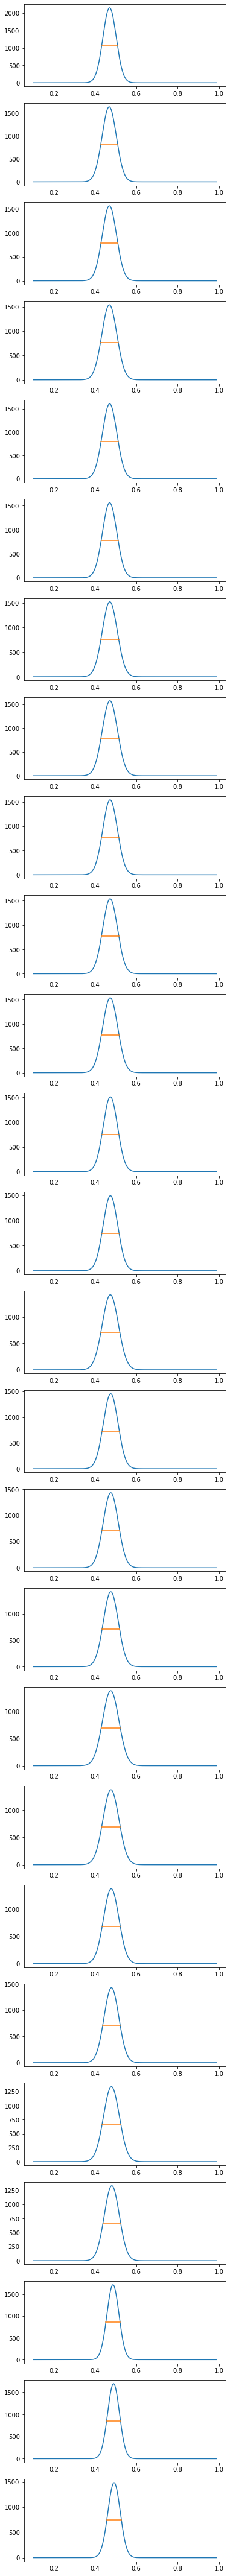

In [98]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.1   # region start and end
END_GEN = 0.99
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

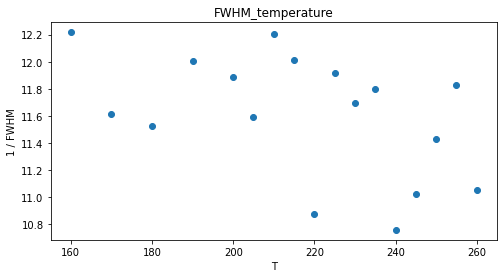

             0
12.208184  130
11.642841  140
12.072911  150
12.217518  160
11.614363  170
11.524762  180
12.004064  190
11.888464  200
11.589881  205
12.204327  210
12.011590  215
10.870076  220
11.917133  225
11.693262  230
11.800009  235
10.755924  240
11.019900  245
11.429526  250
11.828175  255
11.048075  260
11.649670  265
14.603487  270
14.802030  275
14.115644  280


In [99]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[5:22], y[5:22], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[2:],y[2:])
print(df)

# Fig 7

x = 234.03481397551178, y = 12.001555903680597


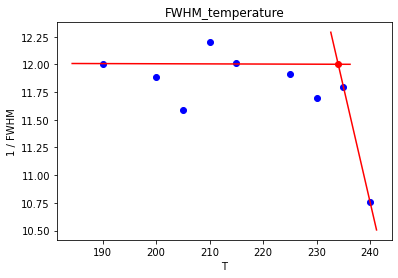

In [108]:
import numpy as np
import sympy

x_fit1 = x[8:10]+x[11:13]+x[14:15]
y_fit1 = y[8:10]+y[11:13]+y[14:15]

res1 = st.linregress(x_fit1, y_fit1)
# plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.05 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[16:18]
y_fit2 = y[16:18]
res2 = st.linregress(x_fit2, y_fit2)
# plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.99 * x_fit2[0], 1.005 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
plt.scatter(x[8:13]+x[14:18], y[8:13]+y[14:18], color='b', linewidth = 1.0, linestyle = '-')
print(f'x = {inter_x}, y = {inter_y}')

In [19]:
import numpy as np
# define a fitting function
# including 自变量x, 振幅amplitude, 对称中心center, 标准差sigma 
# 该表达式是一个带振幅值amplitude的高斯函数表达式
def_1gaussian(x, amp1, cen1, sigma1)
  return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))


IndentationError: ignored